# Field-Effect Transistors (JFET)

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Spice.Library import SpiceLibrary

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Introduction to Field-Effect Transistors

Field-effect transistors (FETs) are a type of **unipolar transistor** (see [](#fet-family)), making them a direct competitor to bipolar junction transistors (BJTs).  

```{figure} ./images/FET_Symbols.svg
:name: fet-family
:align: center
:width: 500px

Family of Field-Effect Transistors
````

FETs use an **electric field** to control the conductivity of a channel within a semiconductor material.

There are three main families of FETs. As shown in the figure above, the most common are:

* The large family of **MOSFETs**
* The smaller family of **IGBTs**
* The **JFETs**, which will be the focus of this notebook

## JFET

The "J" in JFET stands for *Junction*. There are two types of JFETs: **N-channel** and **P-channel**.

This distinction is crucial for circuit design, as it affects the **signs and polarities** in the circuit.

* For an **N-channel JFET**, the channel is doped *N* (negatively), and the gate and substrate are doped *P* (positively).
* For a **P-channel JFET**, the polarities are reversed: the channel is *P-doped* and the gate/substrate are *N-doped*.

This is illustrated in the figure below:

```{figure} ./images/Difference_N_P_channel.svg
:name: difference_channel_N_P
:align: center
:width: 500px

Difference between N-channel and P-channel JFETs
```

## Electronic Designation

### General

As shown in the symbols (cf. [](#symbol_JFET_N), [](#symbol_JFET_P)), JFETs have three terminals:

* **Gate**
* **Drain**
* **Source**

In circuit analysis, understanding the function of each terminal is essential.

Some symbols also include a circle around the device, but this is **not mandatory**.
The primary visual difference between N-channel and P-channel JFETs is the **direction of the arrow**.

### N-Channel JFET

```{figure} ./images/IEEE_315-1975_(1993)_8.6.10.1.b.svg
:name: symbol_JFET_N
:align: center
:width: 200px

N-channel JFET symbol
```

In the figure above, the arrow **points toward the device**, indicating an N-channel configuration.

### P-Channel JFET

```{figure} ./images/IEEE_315-1975_(1993)_8.6.11.1.b.svg
:name: symbol_JFET_P
:align: center
:width: 200px

P-channel JFET symbol
```

Here, the arrow **points away from the device**, indicating a P-channel configuration.

## Voltage-Current Characteristics

As discussed earlier, JFETs have **three terminals**.  
The goal here is to provide a **simple understanding** of how to quickly write the key equations for a JFET.

```{figure} ./images/Tension_courant_JFET_N_componant.svg
:name: T_A_JFET_componant
:align: center
:width: 200px

Visualization of currents and voltages in an N-channel JFET
````

We start with an **N-channel JFET**.
The figure above ([](#T_A_JFET_componant)) highlights the **important characteristics** of the device:

* $V_{DS}$: Drain-source voltage, always **positive**
* $V_{GS}$: Gate-source voltage, typically **negative or slightly positive** (< 0.6 V)
* $I_G$: Gate current, almost **zero**, often approximated as $I_G = 0$ in equations
* $I_D$: Current entering the **drain** terminal
* $I_S$: Current leaving the **source** terminal

```{figure} ./images/JFET_n-channel_en.svg
:name: JFET_n-channel_en
:align: center
:width: 500px

Main characteristics of an N-channel JFET
```

The figure above ([](#JFET_n-channel_en)) shows the **graphical representation** of the N-channel JFET characteristics.
In the next section, we will formulate the corresponding **equations** based on these voltages and currents.

## Mathematics

### Linear (Ohmic) Region

This region follows the condition:

$$
\begin{cases}
V_{GS} > V_P \\
V_{DS} ≤ V_{GS} - V_{P}
\end{cases}
$$

Donc que nous sommes avant la courbe noir en ponitié, ce veut que que : It applies **only when the current in an N-channel JFET is caused by a small drain-source voltage ($V_{DS}$)**.

The theoretical expression is:

$$
I_D = \frac{b W}{L} q N_d \mu_n V_{DS}
$$

where:

* $I_D$ — Drain-source current
* $b$ — Channel thickness for a given gate voltage
* $W$ — Channel width
* $L$ — Channel length
* $q$ — Elementary charge ($1.6 \times 10^{-19}$ C)
* $\mu_n$ — Electron mobility
* $N_d$ — N-type donor doping concentration
* $V_{DS}$ — Drain-source voltage (approaching 0)

```{note}
In practice, this equation is rarely used because it requires parameters that are difficult to measure precisely.
```

Instead, a more practical and commonly used approximation is:

```{math}
:label: equation_JFET_linear
I_D = \frac{2 I_{DSS}}{V_P^2} \left(V_{GS} - V_P - \frac{V_{DS}}{2}\right) V_{DS}
```

where:

* $I_{DSS}$ — Maximum drain current for $V_{GS} = 0$
* $V_P$ — Pinch-off voltage (the gate-source voltage where the channel closes)
* $V_{GS}$ — Gate-source voltage
* $V_{DS}$ — Drain-source voltage

This expression is widely used in circuit design because it relies on **measurable electrical parameters** rather than hard-to-obtain physical constants.

From this, we can derive the approximate resistance $R_{DS}$:

```{math}
:label: equation_JFET_linear_resistance
R_{DS} \approx \frac{V_P^2}{2 I_{DSS} (V_P - V_{GS})}
```

```{dropdown} Demonstration — Derivation of $R_{DS}$
We start with:
$R_{DS} = \frac{V_{DS}}{I_D}$

Substituting equation [](#equation_JFET_linear):
$R_{DS} = \frac{V_{DS}}{\frac{2 I_{DSS}}{V_P^2} \left(V_{GS} - V_P - \frac{V_{DS}}{2}\right) V_{DS}}$

Since $V_{DS}$ tends toward 0, we can neglect $\frac{V_{DS}}{2}$, giving:
$R_{DS} = \frac{V_{DS}}{\frac{2 I_{DSS}}{V_P^2} (V_{GS} - V_P) V_{DS}}$

Simplifying (canceling $V_{DS}$):
$
R_{DS} \approx \frac{V_P^2}{2 I_{DSS} (V_P - V_{GS})}
$

which matches equation [](#equation_JFET_linear_resistance).
```

### Constant Current Region


We now move to the **saturation region**, where the current becomes nearly independent of $V_{DS}$,
c'est la région qui est après les pointiés noir et qui respecte les conditions suivante :
$$
\begin{cases}
V_{GS} > V_P \\
V_{DS} ≥ V_{GS} - V_{P}
\end{cases}
$$

alors nous avons l'équation suivante

```{math}
:label: Shockley
I_{D} = I_{DSS}\left(1 - \frac{V_{GS}}{V_P}\right)^2
```

L’équation [](#Shockley) est connue sous le nom d’équation de Shockley. Avec la modulation de longueur de canal prise en compte, le courant de saturation est modifié pour devenir l'équation [](#modulation-longueur-canal).


```{math}
:label: modulation-longueur-canal
I_D=I_{DSS}(1−\frac{V_{GS}}{V_P})2(1+λV_{DS})
```
 

Dans cette équation, le terme de modulation de longueur de canal montre comment le courant de la région de saturation change avec la tension drain-source, $V_{DS}$. Gardez à l'esprit que, sous fonctionnement normal, la **jonction porte-canal du JFET est polarisée en sens inverse**, et donc, pour un *JFET à canal n*, **$v_{GS} ≤ 0$**.

### Résumé équation 

En résumé les équations sont les suivantes :

$$
I_D = \frac{2 I_{DSS}}{V_P^2} \left(V_{GS} - V_P - \frac{V_{DS}}{2}\right) V_{DS} \text{ when }
\begin{cases}
V_{GS} > V_P \\
V_{DS} ≤ V_{GS} - V_{P}
\end{cases}
$$

$$
I_{DS} = I_{DSS}\left(1 - \frac{V_{GS}}{V_P}\right)^2 \text{ when }
\begin{cases}
V_{GS} > V_P \\
V_{DS} ≥ V_{GS} - V_{P}
\end{cases}
$$

## Simulation

L'objectif de cette partie est de comprendre la simulation est de comprendre les différents paramètres de la simualtion pour ensuite si le cas se présent pouvoir agir sur ces paramètres.

Le modèle de simulation est le suivant (cf. [](#spice_jfet)):

```{figure} ./images/spice_jfet.svg
:name: spice_jfet
:align: center
:width: 200px

Modèle simulation Spice d'un JFET-N
```

Tout d'abord, le fichier de la simulation est la suivante :

```text
.model 2N3819 NJF(
    Beta=1.304m 
    Betatce=-.5 
    Rd=1 
    Rs=1 
    Lambda=2.25m 
    Vto=-3 
    Vtotc=-2.5m 
    Is=33.57f 
    Isr=322.4f 
    N=1 Nr=2 
    Xti=3 
    Alpha=311.7u 
    Vk=243.6 
    Cgd=1.6p 
    M=.3622 
    Pb=1 
    Fc=.5 
    Cgs=2.414p 
    Kf=9.882E-18 
    Af=1 
    mfg=Vishay)
```

Tout d'abord, nous pouvons reconnaitre `Rd = 1` et `Rs = 1` qui corresponde au résistance dans les pattes respectivements de `d` et de `s`, il est possible de voir que leur valeur est à 1 cela est du faite que dans la documentation aucune information est donnée, donc c'est à nous utilisateur de mesure ces résistances puis de les insérer dans la simulation de manière manuel. Nous pouvons aussi reconnaitre les paramètres `Cgs=2.414p` et `Cgd=1.6p ` dont les noms sont très proches du modèle de simulation. Nous pouvons aussi voir le paramètre $λ$ de l'équation [](#modulation-longueur-canal).

Néanmoins, nous ne vayons pas les deux constantes les plus important à savoir $I_{DSS}$ et $V_P$ qui apparaisse dans les trois équations ([](#equation_JFET_linear), [](#Shockley), [](#modulation-longueur-canal))

La tension de pincement $V_P$ est noté `Vto` dans le document et elle vaut -3 : `Vto=-3 `

Pour $I_{DSS}$ cela est du au faite que l'on ne trouve pas directement, il faut faire le calcule [](#calcul_Idds) :

```{math}
:label: calcul_Idds
\text{BeTa}=\frac{I_{DSS}}{V^2_P}
```

Les équations dans Spice deviennent : 

$$
I_D =
\begin{cases}
0, & V_{GS} \le V_T \\[6pt]
\text{BeTa}\,(2(V_{GS}-V_T)V_{DS} - V_{DS}^2)\,(1 + \lambda V_{DS}), 
& V_{GS} > V_T \ \text{and}\  V_{DS} \le V_{GS} - V_T \\[6pt]
\text{BeTa}\,(V_{GS}-V_T)^2\,(1 + \lambda V_{DS}), 
& V_{GS} > V_T \ \text{and}\  V_{DS} \ge V_{GS} - V_T
\end{cases}
$$

In [3]:
## Calcule de la fonction de transfert

circuit = Circuit('Main characteristics of an N-channel JFET')
circuit.include('lib/standard.lib')


# --- Paramètres
Vgs_values = [-2@u_V, -1@u_V, -0.5@u_V,0@u_V]   # différentes tensions de grille
Vds_max = 8@u_V
Vp = -3
Idss = 1.304e-3 * Vp**2

# --- Nœuds et alimentation
circuit.V('GS', 'gate', 'source', 0@u_V)   # Vgs variable
circuit.V('DS', 'drain', 'source', 0@u_V)  # Vds variable

# Relier la source à la masse pour éviter le flottement
circuit.R('S', 'source', circuit.gnd, 1@u_MΩ)  # résistance de fuite très grande

# --- Transistor JFET N 2N3819
circuit.J('1', 'drain', 'gate', 'source', model='2N3819')

.title Main characteristics of an N-channel JFET
.include C:\Users\sacha\Desktop\Python\Electronique\electronique_book\Base_componant\transistor\lib\standard.lib
VGS gate source 0V
VDS drain source 0V
RS source 0 1MegOhm
J1 drain gate source 2N3819



In [4]:
# --- Simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

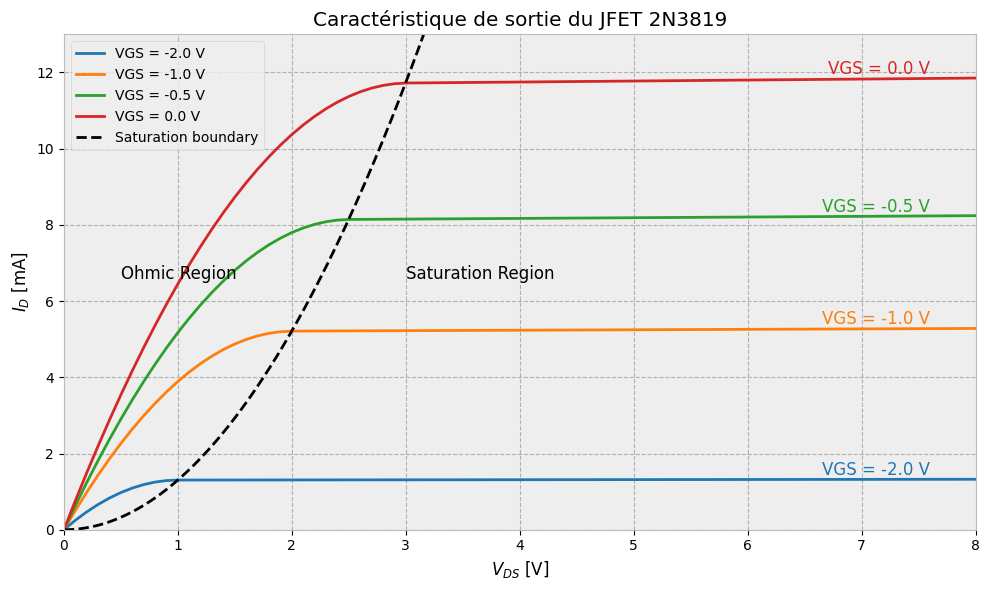

In [5]:
figure, ax = plt.subplots(figsize=(10, 6))

for i, Vgs in enumerate(Vgs_values):
    # on fixe la tension Vgs
    circuit['VGS'].dc_value = Vgs

    # on balaie Vds de 0 à 10V
    analysis = simulator.dc(VDS=slice(0, Vds_max, 0.1@u_V))

    # extraction du courant de drain (note : courant entrant = négatif)
    Id = -analysis.branches['vds']

    ax.plot(analysis['drain'], Id*1e3, label=f'VGS = {float(Vgs)} V')

    x_annot = float(Vds_max) * 0.95
    y_annot = (Id[-1]*1e3)
    ax.text(x_annot, y_annot, f"VGS = {float(Vgs):.1f} V",
            fontsize=12, color=f'C{i}', ha='right', va='bottom')

# --- Courbe parabolique de la limite de saturation
Vgs_curve = np.linspace(Vp, 1, 200)
Vds_sat = Vgs_curve - Vp
Id_sat = Idss * (1 - Vgs_curve / Vp) ** 2

ax.plot(Vds_sat, Id_sat*1e3, 'k--', lw=2, label='Saturation boundary')

# --- Noms des zones
ymax = ax.get_ylim()[1]
ax.text(0.5, 0.3*ymax, 'Ohmic Region', fontsize=12, color='black')
ax.text(3, 0.3*ymax, 'Saturation Region', fontsize=12, color='black')

# --- Mise en forme du graphique
ax.legend()
ax.grid(True)
ax.set_xlabel('$V_{DS}$ [V]')
ax.set_ylabel('$I_D$ [mA]')
ax.set_title('Caractéristique de sortie du JFET 2N3819')
ax.set_xlim(0, 8)
ax.set_ylim(0, 13)
plt.tight_layout()
plt.show()

## Circuit Configurations (In processing not to be taken into account)

There are three basic configurations using a **JFET (Junction Field Effect Transistor)**, depending on which terminal is common to both the input and output:

* **Common Source (CS)**
* **Common Gate (CG)**
* **Common Drain (CD)**

The goal of the following sections is to understand the differences between these configurations and to learn how to use them effectively.


### Common Source Configuration

The **common-source amplifier** is shown in the figure below (see [](#channel_JFET_common_source)).

In this circuit:

* The **source** terminal is connected to **ground** (hence the name *common source*).
* The **drain** terminal is connected to a **load resistor** $R_D$, which is supplied by the **DC voltage source** $V_{+}$.
* The **input signal** $V_{in}$ is applied to the **gate**.
* The **output voltage** $V_{out}$ is taken between the **drain** and the resistor $R_D$.

```{figure} ./images/N-channel_JFET_common_source.svg
:name: channel_JFET_common_source
:align: center
:width: 200px

Common-source configuration
```

This configuration is called *common source* because the **source** terminal is common to both the input and the output, and it is usually connected to ground.

### Small-Signal Model

The small-signal equivalent model of the JFET (see [](#FET_modelisation)) can be represented as follows:

* The **input** has a resistance $R_{in}$.
* The **transistor** is modeled by a **voltage-controlled current source** of value $g_m$ $V_{gs}$, where $g_m$ is the **transconductance**.
* The **output** consists of the **drain resistance** $r_d$ (the internal dynamic resistance of the JFET) in parallel with the load resistor $R_D$.

```{figure} ./images/FET_modelisation.svg
:name: FET_modelisation
:align: center
:width: 200px

Small-signal model of a JFET
```

### Main Characteristics

We can now derive the three main parameters of this circuit:

* **Input resistance** $R_{in}$
* **Output resistance** $R_{out}$
* **Voltage gain** $A_v$

#### 1. Input Resistance

Since the gate of a JFET draws almost no current (due to the reverse-biased PN junction), the input resistance is very high:

$$
R_{in} \approx R_G
$$

where $R_G$ is the gate bias resistor.
Typical values range from **hundreds of kΩ to several MΩ**.


#### 2. Output Resistance

The output resistance is the resistance seen looking into the drain terminal:

$$
R_{out} = r_d \parallel R_D
$$

where ( $r_d$ ) is the internal drain resistance (typically tens of kΩ).


#### 3. Voltage Gain

The voltage gain of the common-source amplifier is given by:

$$
A_v = \frac{V_{out}}{V_{in}} = -g_m R_D
$$

where:

$$
R_D' = R_D \parallel r_d
$$

The **negative sign** indicates a **phase inversion** between input and output (the output decreases when the input increases).


### Summary Table

| Quantity    | Expression                     | Comment                           |
| ----------- | ------------------------------ | --------------------------------- |
| $R_{in}$    | $\approx R_G$                  | Very high (due to insulated gate) |
| $R_{out}$   | $= R_D \parallel r_d$          | Moderate to high                  |
| $A_v$       | $= -g_m (R_D \parallel r_d)$   | Inverted output phase             |

En résumé l'entrée est la sortie va avoir une sortie avec une impédance élévé ce qui peut posé des problèmes surtout au niveau de la sortie.

### Biasing (DC Analysis)

Before applying an AC signal, the JFET must be properly biased to operate in the **active (or saturation) region**.

The DC equivalent circuit allows us to determine the **operating point** ($I_D$, $V_{GS}$, $V_D$).

1. **Drain Current Equation**

The drain current in the saturation region follows the **Shockley equation**:

$$
I_D = I_{DSS} \left(1 - \frac{V_{GS}}{V_P}\right)^2
$$

where:

* $I_{DSS}$ = drain current for $V_{GS} = 0$
* $V_P$ = pinch-off voltage (negative for N-channel JFETs)

2. **Voltage Relations**

From the circuit:

$$V_D = V_{DD} - I_D R_D$$

$$V_{GS} = V_G - V_S$$

If the source is grounded ($V_S = 0$), then $V_{GS} = V_G$.

If there is a **source resistor** $R_S$ for self-biasing, then:

$$
V_S = I_D R_S
\quad \text{and thus} \quad
V_{GS} = -I_D R_S
$$


3. **Operating Condition**

For the transistor to remain in the **saturation region**, the following condition must be satisfied:

$$V_{DS} > V_{GS} - V_P$$

This ensures the transistor operates as a voltage-controlled current source rather than a simple resistor.


ref
https://www.allaboutcircuits.com/textbook/semiconductors/chpt-5/simulating-jfet-circuits-using-ltspice/
https://circuitelectronics.github.io/StudentEffort/StudentEffort/JFET_TRansistor/JFETTrans.html#jfet-voltage-controlled-resistor